In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 18

@author: yaning
"""

import HH as HH
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# presynapse spikes three times
tsp = [50,100,150]
e_init = 0.7
tau_rec = 10
u_se = 0.5
pointCount = 200
times = np.arange(pointCount)
h = 0.1

In [89]:
# functions for e(m,n) synaptic efficacy
# analytical within non-spike period
def e_normal_analytical(t_step):
    e = 1-np.exp(-t_step/tau_rec)*(1-e_init)
    return e

def e_update(e, etsp):
    return (1-e)/tau_rec - u_se*etsp

In [55]:
# w(m,n) synapse weight
def w_spike(past_pre, past_post, t_step):
    

SyntaxError: incomplete input (3125496681.py, line 3)

In [90]:
def runge_kutta(f, y0, h, etsep):
    k1 = f(y0, etsep)
    k2 = f(y0 + h*k1/2, etsep)
    k3 = f(y0 + h*k2/2, etsep)
    k4 = f(y0 + h*k3, etsep)

    e_next = y0 + 1/6*(k1 + 2*k2 + 2*k3 + k4)

    return e_next

In [98]:
e = e_init
e_list = []
for t_step in times:
    if t_step not in tsp:
        e = runge_kutta(e_update, e, h, 0)
    else:
        e = runge_kutta(e_update, e, h, e)
    
    e_list.append(e)

In [92]:
e_list = np.array(e_list)

In [93]:
e_list.shape

(200,)

In [ ]:
e_list

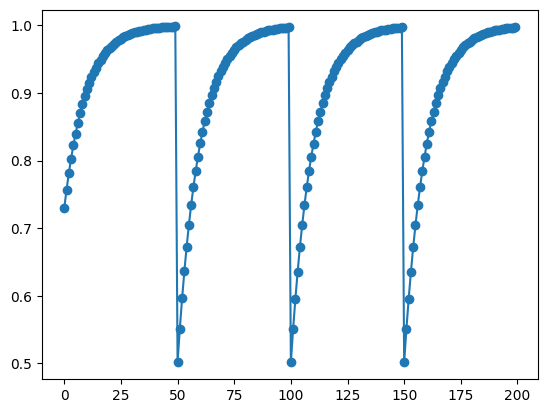

In [99]:
plt.plot(times, e_list, marker='o', linestyle='-')